* このノートブックは、Amazon Braket のスタート時にクローンされるノートブック
Braket examples/getting_started/0_Getting_started.ipynb
に含まれるものを日本語訳と編集を加えたものです。

# Amazon Braket 入門

このhello-worldチュートリアルでは、2つのキュービット間で最大限に絡み合ったベル状態を準備します。 次に、ローカルシミュレータで回路を実行し、結果を取得します。

In [3]:
%env 

'sugiurahajime'

In [2]:
# general imports
import matplotlib.pyplot as plt
%matplotlib inline
# AWS imports: Import Braket SDK modules
from braket.circuits import Circuit
from braket.devices import LocalSimulator


## 1. Local Simulator で回路を構築する

2つの量子ビットで「ベル状態」を構築しましょう。 `Circuit（）` を呼び出すことにより、空の回路を作成し、回路にゲートを追加するだけです。

In [3]:
# build a Bell state with two qubits. Here 'cnot(control=0, target=1)' can be simplified as 'cnot(0,1)'
bell = Circuit().h(0).cnot(control=0, target=1)

In [4]:
print(bell)

T  : |0|1|
          
q0 : -H-C-
        | 
q1 : ---X-

T  : |0|1|


### 回路をローカルシミュレータに送信し、結果を取得します

ここでは、回路をローカルシミュレータに送信して、結果を取得します。

In [5]:
# set up device
device = LocalSimulator()

# run circuit
result = device.run(bell, shots=10).result()
# get measurement shots
counts = result.measurement_counts
# print counts
print(counts)

Counter({'00': 5, '11': 5})


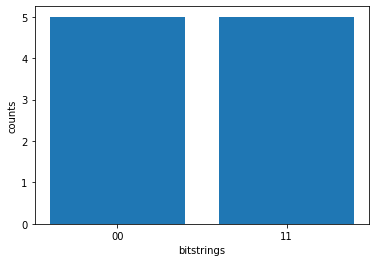

In [6]:
# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

## [演習] shot 数を増やして 量子計算の挙動の違いを確認する

`result = device.run(bell, shots= 10).result()`
shot の数 を 10 -> 100 -> 1000 -> と増やしてみてください。
（Local Simulator で shot 数を増やしても、shot 数に対して課金される料金に変化はありません）

* shot 数 100,000 以上になると、計算時間が急に増えてきますので、ご注意ください。目安の shot 数は、最大 10,000,000程度まで

{'00': 0.51, '11': 0.49}
CPU times: user 60.9 ms, sys: 5.75 ms, total: 66.6 ms
Wall time: 121 ms


Text(0, 0.5, 'probabilities')

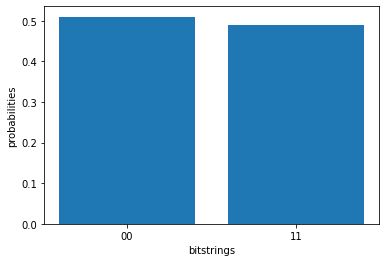

In [7]:
%%time
# run circuit
result = device.run(bell, shots= 100).result()
# get measurement shots
counts = result.measurement_probabilities
# print counts
print(counts)

# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('probabilities');

shot の数を10, 100, 1000と増やしていくと、|00>状態と|11>状態の観測確率がほぼ等しく50%に近づいていくことがわかりましたか？

このように、統計誤差を無くすために（理想的な計算をするために）どの程度のショット数が必要かを見積もることができます。